# Introduction

UFO sightings, is a very interestic topic to do some analysis on. Many believe that life outside earth does not exist and many people believe otherwise. 

Few of them have claimed to have seen UFO's. We have this information from https://www.kaggle.com/NUFORC/ufo-sightings/data

So lets do some analysis on this data.


# Whats our goal?

- When and where do people see UFOs in California?
- What is the average length of UFO sightings across the U.S. states?
- Are there differences in the circumstances of UFO sightings across the U.S. states? (Explore the comment column)

# Procedure


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
import pandas as pd
ufo_db = pd.read_csv('scrubbed.csv', low_memory=False)
ufo_db.columns=['date', 'city', 'state', 'country', 'shape','seconds','hours','comments','dateyear','latitude','longitude']
#ufo_db.head(1)

The above code was run to rename the columns for better understanding. The renaming was done after looking at the column names in "scrubbed.csv" file in the local system.

Now that we have uploaded and read the data in this jupyter notebook, its time to meet our goals.

##### (Links I have used, I have pasted between the document. The rest of the code which do not have links I have written myself based on learnings and teachings in the class, course from codeacademia and some previously on Google.)

# Where do people see UFOs in United States - The top/bottom 10 states for UFO sightings

We could just show where people have seen UFO's in United States, but I thought it would be interesting to find out the top/bottom 10 states where there has been most/least number of sightings.

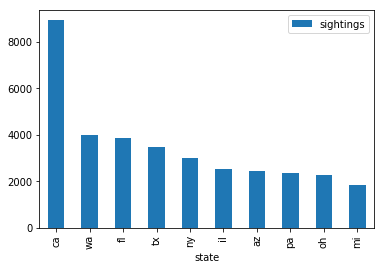

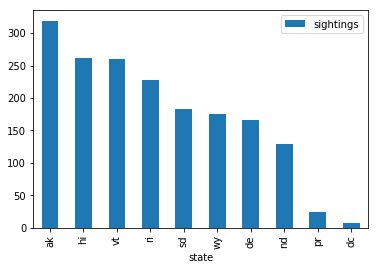

In [4]:
ufo_us_db = ufo_db.loc[ufo_db['country'] == 'us']

ufo_state = ufo_us_db.groupby(['state'])['state'].count().reset_index(name='sightings').sort_values(['sightings'], ascending=False).head(10)
ufo_state.plot.bar(x='state',y='sightings')

ufo_state = ufo_us_db.groupby(['state'])['state'].count().reset_index(name='sightings').sort_values(['sightings'], ascending=False).tail(10)
ufo_state.plot.bar(x='state',y='sightings')

We see here that amongst the top 10 most sightings in the States, California stands out. 
In the second plot we also see the state dc to have the least number of sightings.

Although it could be a possibility I personally dont believe that UFO's have actually landed or come close to the surface of earth even though I believe in life outside earth. 

With this plot I can assume that people here are more read, aware and exposised to science fiction movies, books and stories. They are more into science compared to other states. But I could be wrong as DC shows as least sightings.

Now since CA is the state with the highest sightings, lets deep dive and figure out when and where in California were the sightings.

# Where do people see UFOs in California?


The blow code was referred from https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
I had to install basemap which let me to plot points on a map as our dataset has longitude and lattitude values.

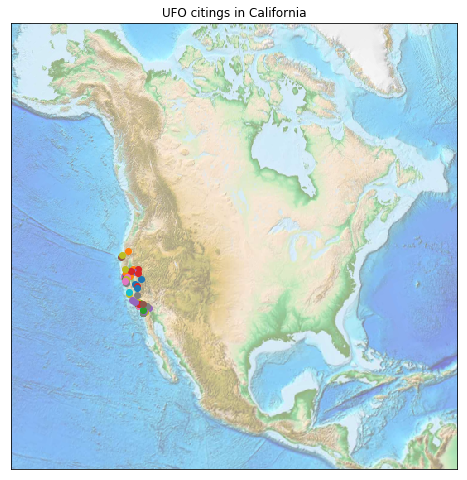

In [5]:
# VISUAL REPRESENTATION OF UFO SIGHTINGS IN CALIFORNIA

fig = plt.figure(figsize=(8, 16))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

counter = 0
for index, row in ufo_db.iterrows():
    if (row['state']=='ca'):
        counter = counter + 1
        #Ploting too many values (> 100) makes it very slow
        if (counter < 100):
            x, y = m(row['longitude'], row['latitude'])
            plt.plot(x,y,marker='o')
plt.title("UFO citings in California");
plt.show();


From the above graph it looks like most of the sightings were around the bay itself. But since its not very clear, lets look at top 10 cities where UFO's were sighted.

# TOP CITIES IN CALIFORNIA WHERE UFOs WERE SEEN

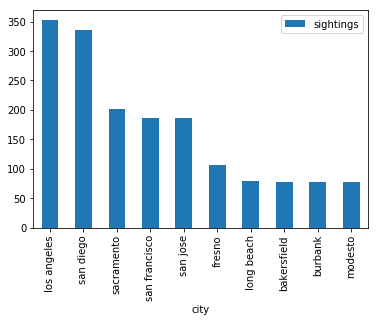

In [6]:
#TOP CITIES IN CALIFORNIA SORTED BY THE NUMBER OF TIMES UFOs WERE SEEN
ufo_ca_db = ufo_db.loc[ufo_db['state'] == 'ca']

ufocity = ufo_ca_db.groupby(['city'])['date'].count().reset_index(name='sightings').sort_values(['sightings'], ascending=False).head(10)
ufocity.plot.bar(x='city',y='sightings')

This above graph shows us that most of the sightings in california was claimed to be in Los Angeles. And from the looks of the top 10 cities, I would still have the claim that the people these cities are more technical oriented, knowledgable and more exposed to science fiction stories/movies.

# When do people see UFOs in California?

Looking at the date time format in the data set, I decided to split it and store them as years. Upon filtering based on 'ca' state, I wanted to plot a graph of count of sightings per city in California.

C:\Users\Bhargav Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bhargav Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


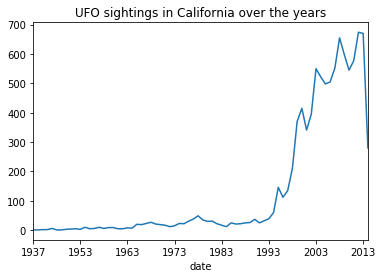

In [7]:
#TO CHECK WHAT YEARS UFOs WERE SEEN  IN CALIFORNIA

ufo_ca_db = ufo_db.loc[ufo_db['state'] == 'ca']


ufo_ca_db['date'] = ufo_ca_db['date'].str.split('/').str[-1]
ufo_ca_db['date'] = ufo_ca_db['date'].str[:4]
#ufo_ca_db

ufo_ca_db = ufo_ca_db.drop(ufo_ca_db.columns[[2,3,4,5,6,7,8,9,10]], axis=1)
#ufo_ca_db.groupby(['city','date'])['date'].count().head(10)
#ufo_ca_db1


import pandas as pd
new1 = ufo_ca_db.groupby(['date'])['date'].count()
#new1
new1.plot.line(x='date',y='count',title='UFO sightings in California over the years')



From this we can see that most of the sightings or the highest number of sightings were seen from 1993 - 2013.

Now lets break it down further to understand around what times were these sightings.

C:\Users\Bhargav Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bhargav Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


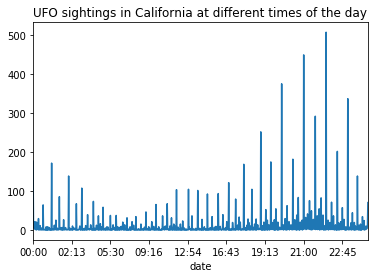

In [8]:
#TO CHECK WHAT TIME OF THE DAY UFOs WERE SEEN  IN CALIFORNIA
ufo_ca_db1 = ufo_db.loc[ufo_db['state'] == 'ca']

ufo_ca_db1['date'] = ufo_ca_db1['date'].str.split('/').str[-1]
ufo_ca_db1['date'] = ufo_ca_db1['date'].str[5:10]
#ufo_ca_db1

ufo_ca_db1 = ufo_ca_db1.drop(ufo_ca_db1.columns[[2,3,4,5,6,7,8,9,10]], axis=1)
#ufo_ca_db.groupby(['city','date'])['date'].count().head(10)
#ufo_ca_db1

new2 = ufo_ca_db1.groupby(['date'])['date'].count()
new2.columns = ['date','count']
new2.plot.line(x='date',y='count',title='UFO sightings in California at different times of the day')


Looking at this plot we can see that most of the sightings were between 7pm - 11pm in the night. 

The time and date also supports my assumptions that, most of the movies or stories regarding aliens or UFO's were during the late 20th and early 21st century. And in most of these stories it was always mentioned that UFO's landed on earth at night (after the sun set.)


# What is the average length of UFO sightings across the U.S. states?

In [9]:
#ufo_db['seconds'].mean()
# Will return inf. You need to convert it into int type.
ufo_us_db = ufo_db.loc[ufo_db['country'] == 'us']

new = ufo_us_db[['seconds']].copy() 
# Just take one column otherwise the whole db is huge to convert to numeric

new[['seconds']] = new[['seconds']].apply(pd.to_numeric, errors='coerce')
print ("Average length of sightings   :", new['seconds'].mean()/60 , " minutes")

Average length of sightings   : 96.66986747962486  minutes


We have the data of duration in seconds, so taking that data and converting in to numeric values and dividing the mean by 60 gives me the average minutes of sightings across the United States (upon applying the country filter).

Across the United States the Average length of sightings is approximately 97 minutes.

# Based on comments, what can we say about the UFO sightings across the states?

This was/is a very tough challenge, as I had no clue where to start with. 
This particular section took me almost 2 days to figure out and I am still figuring out some details.

But let me tell you my thought process.

Although the above code didnt require much research, except a few stackover flows I googled. The below section however took a quite a bit of reading as I had not done an analysis based on random comments.

The links I referred for the below section are:
- https://anaconda.org/conda-forge/textblob
- http://www.nltk.org/
- https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers
- https://stackoverflow.com/questions/35559199/textblob-sentiment-analysis-on-a-csv-file


First, I came across TextBlob. It uses natural language processing and gives a polarity which ranges from -1.0 to 1.0 (similar to negetive to positive). To use TextBlob, I had to download the package using the code given in the comments below.

I wanted to use this to perform a sentiment analysis and understand how people percieve these UFO sightings and under what circumstances.

In [10]:
#Need to install on ananconda promt conda install -c conda-forge textblob
from textblob import TextBlob

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

ufo_sent = ufo_db.loc[ufo_db['country'] == 'us']
#ufo_sent = ufo_db.loc[ufo_db['state'] == 'mi']
ufo_sent = ufo_sent.drop(ufo_sent.columns[[0,1,3,4,5,6,8,9,10]], axis=1)
#ufo_sent.head()

ufo_sent['sentiment'] = ufo_sent['comments'].apply(sentiment_calc)
ufo_sent.head()


,state,comments,sentiment
0,tx,This event took place in early fall around 194...,0.100000
3,tx,My older brother and twin sister were leaving ...,0.055556
4,hi,AS a Marine 1st Lt. flying an FJ4B fighter/att...,0.000000
5,tn,My father is now 89 my brother 52 the girl wit...,-0.125000
7,ct,A bright orange color changing to reddish colo...,0.350000


This did not give me much insight and I alternatively tried the mean of the polatiries grouped by state, but all of that resulted in polarities above 0.0 (positive) which also resulted in no major observation.


I then came across nltk data. This has a bunch of datasets from where we can learn and train analyser packages to check for positive and negetive. NaiveBayesAnalyzer is one such package from the textblob library that can analyse.

Amongst the nltk data, I came across movie reviews data set, which I planned to use agaist the comments from our original dataset as to figure out positive and negetive comments. Based on this I assumed I could make some analysis.


In [7]:
#conda install -c conda-forge nltk_data
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
from nltk.corpus import movie_reviews
#nltk.download()
#nltk.download('punkt')

def sentiment_calc(text):
    try:
        return TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment.classification
    except:
        return None

ufo_sent = ufo_db.loc[ufo_db['country'] == 'us']
#ufo_sent = ufo_db.loc[ufo_db['state'] == 'mi']
ufo_sent = ufo_sent.drop(ufo_sent.columns[[0,1,3,4,5,6,8,9,10]], axis=1)
ufo_sent = ufo_sent.head(50)

ufo_sent['sentiment'] = ufo_sent['comments'].apply(sentiment_calc)
#ufo_sent.to_excel("ufo_sentiment.xlsx")
ufo_sent


,state,comments,sentiment
0,tx,This event took place in early fall around 194...,pos
3,tx,My older brother and twin sister were leaving ...,pos
4,hi,AS a Marine 1st Lt. flying an FJ4B fighter/att...,pos
5,tn,My father is now 89 my brother 52 the girl wit...,pos
7,ct,A bright orange color changing to reddish colo...,pos
8,al,Strobe Lighted disk shape object observed clos...,pos
9,fl,Saucer zaps energy from powerline as my pregna...,pos
10,ca,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,pos
11,nc,silent red /orange mass of energy floated by t...,pos
12,ny,silver disc seen by family and neighbors,pos


The data is so huge that I was not able to perform the analysis for all the records. I first tried to count the number of positives and negetives but after the endless execution, I stopped the program and tried to convert it to excel to read from it. But that also took ages! 

Due to the crunch of time, I decided to show 50 records with positive and negetive, which match the positives and negetives from the movie reviews dataset. 

Going through the 50 records, it seems like the negetive sentiments are for those comments that does not fit the description of UFO's or doesnt make it a believable arugment. For example: "A red glowing sphere stopped and watched me". This comment does not give clarity on the UFO or where it was found. Also it does not match anything from stories/movies.

Whereas, the positive sentiments are for those comments that give more clarification on UFO's and the circumstances that they were sighted in.


# Observation & Conclusion

- California is the state with most number of UFO sightings.
- DC is the state with the least number of UFO sightings.
- Los Angeles is the city with the most number of sightings within California.
- Most of the UFO sightings have been around the years 1993 - 2013
- Most of the sightings are around the night time from 7pm - 11pm
- There are many comments from people that dont fit the description of UFO's or give any circumstance.

# Roadmap to Future

- Spend more time on analysing the comments. 
- Count the number of positives and negetives per state and make an analysis.
- From the positive comments, pick out certain words and count common circumstances.
- Answer the Boss Question.